In [37]:
import mlflow
from datetime import datetime
import mlflow.keras
from tensorflow import keras
from bing_image_downloader import downloader
import imghdr
import os
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import requests

In [3]:
train_image_path = "./train-data"

In [4]:
# Download images
# def download_images(query, limit, output_dir):
    
#     downloader.download(query,
#                         limit=limit,
#                         output_dir=output_dir,
#                         adult_filter_off=True,
#                         force_replace=False,
#                         timeout=60)

# download_images("cat", 100, train_image_path)
# download_images("dog", 100, train_image_path)

[%] Downloading Images to /Users/manassamantaray/Projects/streamlit-mlflow/train-data/cat


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://get.pxhere.com/photo/animal-cute-pet-fur-portrait-fluffy-kitten-cat-feline-tabby-mammal-fauna-close-up-whiskers-kitty-tiger-furry-vertebrate-domestic-adorable-cute-cat-cute-animals-tabby-cat-bengal-wild-cat-small-to-medium-sized-cats-cat-like-mammal-566214.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://3.bp.blogspot.com/-7ABAaAViPyw/W84wG4scmQI/AAAAAAAAFUU/7jbp2CidXKYRRH81GIFOeEa7-D3GabJqgCLcBGAs/s1600/cat.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://sgaissert.files.wordpress.com/2009/09/lilaccloseup.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.ovrs.com/blog/wp-content/uploads/2014/12/iStock_000029861698_Medium-1.jpg


[%] File Downloaded !

[%] Downloading Image #39 from http://2.bp.blogspot.com/_8UxqOB8rDCg/S7I4g2TuKgI/AAAAAAAABWM/-HyZ7oCwJ-0/s320/Cat.JPG
[%] File Downloaded !



[!!]Indexing page: 7

[%] Indexed 35 Images on Page 7.


[%] Downloading Image #40 from http://youbentmywookie.com/wookie/gallery/1108_wtf/kitty_1.jpg
[%] File Downloaded !



[!!]Indexing page: 8

[%] Indexed 35 Images on Page 8.




[!!]Indexing page: 9

[%] Indexed 35 Images on Page 9.




[!!]Indexing page: 10

[%] Indexed 35 Images on Page 10.




[!!]Indexing page: 11

[%] Indexed 35 Images on Page 11.


[%] Downloading Image #41 from https://2.bp.blogspot.com/-5HdZMDMTEfc/T-ph5QE5iYI/AAAAAAAAFjM/H-fXb6jqOMA/s1600/cat4.jpg
[%] File Downloaded !

[%] Downloading Image #42 from http://thechocl8tdiaries.files.wordpress.com/2008/08/cats.jpg
[%] File Downloaded !

[%] Downloading Image #43 from http://m5.paperblog.com/i/112/1125101/photos-funny-ninja-dogs-and-cats-doing-kung-f-L-ZhVVFq.jpeg
[%] File Downloaded !

[%] Down

[%] Indexed 35 Images on Page 39.


[%] Downloading Image #67 from http://www.arduman.com/aa/Resimler/sean/cat.jpg
[%] File Downloaded !



[!!]Indexing page: 40

[%] Indexed 35 Images on Page 40.


[%] Downloading Image #68 from https://static.wixstatic.com/media/c5f743789818466ba9b1059db49dcc95.jpg/v1/fill/w_620,h_700,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Cat.jpg
[%] File Downloaded !



[!!]Indexing page: 41

[%] Indexed 35 Images on Page 41.


[%] Downloading Image #69 from http://www.adsrex.com/wallpapers/animals/cat/tn_cat_30.jpg
[%] File Downloaded !



[!!]Indexing page: 42

[%] Indexed 35 Images on Page 42.


[%] Downloading Image #70 from http://www.musicaecomputer.com/wallpapers/cats/cats0057.jpg
[%] File Downloaded !



[!!]Indexing page: 43

[%] Indexed 35 Images on Page 43.


[%] Downloading Image #71 from http://2.bp.blogspot.com/-PovVSr5xUZ4/Tc-VAkuXO2I/AAAAAAAAAAM/sQfnOme4Vv4/s320/cat.jpg
[%] File Downloaded !



[!!]Indexing page: 44

[%] Indexed 35 Images on Page 44.

[%] File Downloaded !

[%] Downloading Image #7 from https://img2.thejournal.ie/article/5170458/river?version=5170546&amp;width=1340
[%] File Downloaded !

[%] Downloading Image #8 from http://www.outdoorhub.com/wp-content/uploads/sites/2/2015/08/outdoorhub-top-10-smartest-hunting-dogs-2015-08-05_20-50-44.jpg
[%] File Downloaded !

[%] Downloading Image #9 from http://www.publicdomainpictures.net/pictures/170000/velka/dog-1463218026uIC.jpg
[%] File Downloaded !

[%] Downloading Image #10 from https://www.security-guard.ca/wp-content/uploads/2015/02/shutterstock_78199090.jpg
[%] File Downloaded !

[%] Downloading Image #11 from http://3.bp.blogspot.com/-ZMpwMhvN1vc/VFZ330hGsBI/AAAAAAABN2A/92P-ImlDTmI/s1600/cute-dogs-045-18.jpg
[%] File Downloaded !

[%] Downloading Image #12 from http://1.bp.blogspot.com/_cUuIMoP_aeE/S73Lj3zCtyI/AAAAAAAACTQ/Z3k9Cyz2OfU/s1600/dog.jpg
[%] File Downloaded !

[%] Downloading Image #13 from http://d.ibtimes.co.uk/en/full/380140/dogs.jpg?w=720
[%] File Downlo

[%] File Downloaded !

[%] Downloading Image #43 from https://2.bp.blogspot.com/_qVMbjZEy4t8/SsUzDHqKOGI/AAAAAAAAAPA/nwZXO-bK0EE/s400/12089542_2.jpg
[%] File Downloaded !

[%] Downloading Image #44 from https://duenorthhuskyventures.files.wordpress.com/2010/08/dog-22.jpg
[!] Issue getting: https://duenorthhuskyventures.files.wordpress.com/2010/08/dog-22.jpg
[!] Error:: The read operation timed out
[%] Downloading Image #44 from https://1.bp.blogspot.com/-I7J7OnXR4_4/TgYjcgYQrjI/AAAAAAAADYI/R7rrTjoBS60/s1600/Dog+page-a-day.jpg
[%] File Downloaded !

[%] Downloading Image #45 from https://boundaryfence.com/wp-content/uploads/2013/12/dog-kennel1.jpg
[%] File Downloaded !



[!!]Indexing page: 5

[%] Indexed 35 Images on Page 5.


[%] Downloading Image #46 from https://cdn.fotofits.com/petzlover/gallery/img/l/alaskan-malamute-dog-658586.jpg
[%] File Downloaded !



[!!]Indexing page: 6

[%] Indexed 35 Images on Page 6.


[%] Downloading Image #47 from http://woofingtonsworld.com/wp-content

[!] Issue getting: http://wallpaper.1000webgames.com/wallpapers/fox_terrier_dog_wallpaper-1024x768.jpg
[!] Error:: <urlopen error [Errno 8] nodename nor servname provided, or not known>
[%] Downloading Image #70 from https://citysteps.files.wordpress.com/2010/02/dog1.jpg
[!] Issue getting: https://citysteps.files.wordpress.com/2010/02/dog1.jpg
[!] Error:: The read operation timed out
[%] Downloading Image #70 from https://cdn.fotofits.com/petzlover/gallery/img/l/canadian-eskimo-dog-puppies-850359.jpg
[%] File Downloaded !

[%] Downloading Image #71 from http://1.bp.blogspot.com/-gp4jclwq7es/VFPOGGIE97I/AAAAAAABSN0/u6f9uKs3EIk/s1600/dog5.jpg
[%] File Downloaded !

[%] Downloading Image #72 from https://mediaproxy.salon.com/width/600/https://media.salon.com/2013/02/genius_of_dogs.jpg
[Error]Invalid image, not saving https://mediaproxy.salon.com/width/600/https://media.salon.com/2013/02/genius_of_dogs.jpg

[!] Issue getting: https://mediaproxy.salon.com/width/600/https://media.salon.com/2

In [3]:
#Check the downloaded images
#only keep the files which are acceptable by tensorflow
for category in ["cat","dog"]:
    data_dir = os.path.join(train_image_path, category)
    image_extensions = [".png", ".jpg"]  
    img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
    for filepath in Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image, so removing.")
                os.remove(filepath)
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow, so removing.")
                os.remove(filepath)

## Model Training
Define parameters


In [4]:
learning_rate = 0.01
num_epochs = 27
batch_size = 32
input_shape = (224, 224, 3)

In [5]:
# Define names for tensorboard logging and mlflow
experiment_name = "cat-dog-classifier-mobilenet"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")

In [6]:
# Load the dataset
train_dataset = keras.preprocessing.image_dataset_from_directory(
    train_image_path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)

Found 199 files belonging to 2 classes.
Using 160 files for training.


In [7]:
val_dataset = keras.preprocessing.image_dataset_from_directory(
    train_image_path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)

Found 199 files belonging to 2 classes.
Using 39 files for validation.


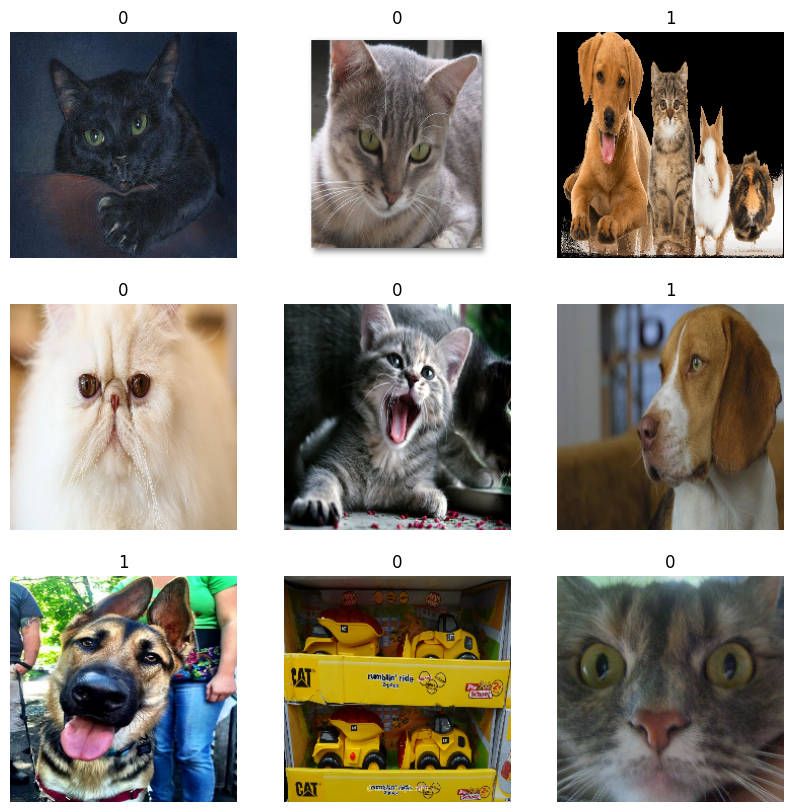

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

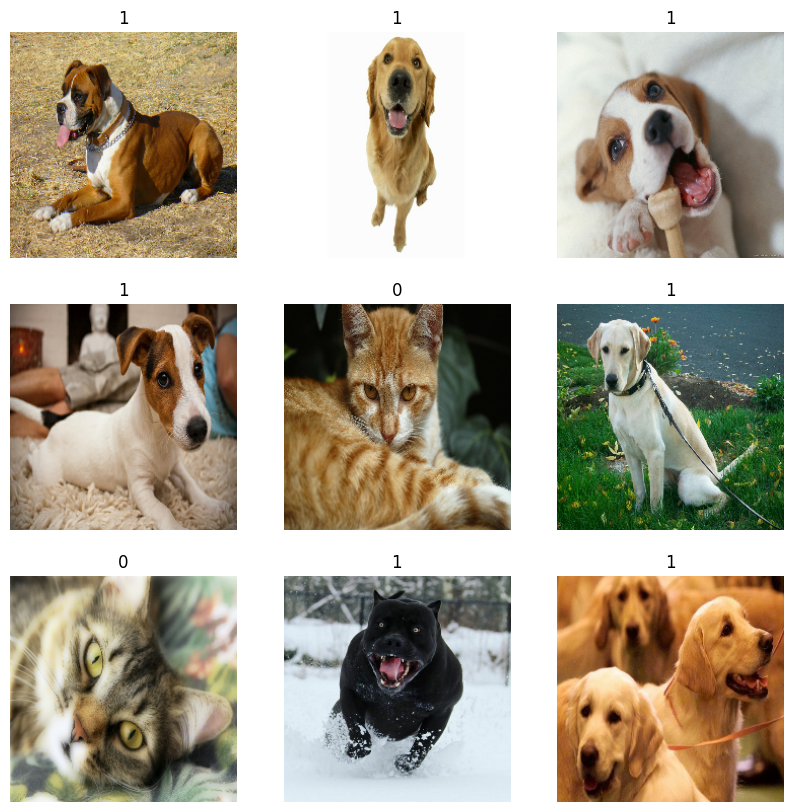

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in val_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Data Augmentation

In [10]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

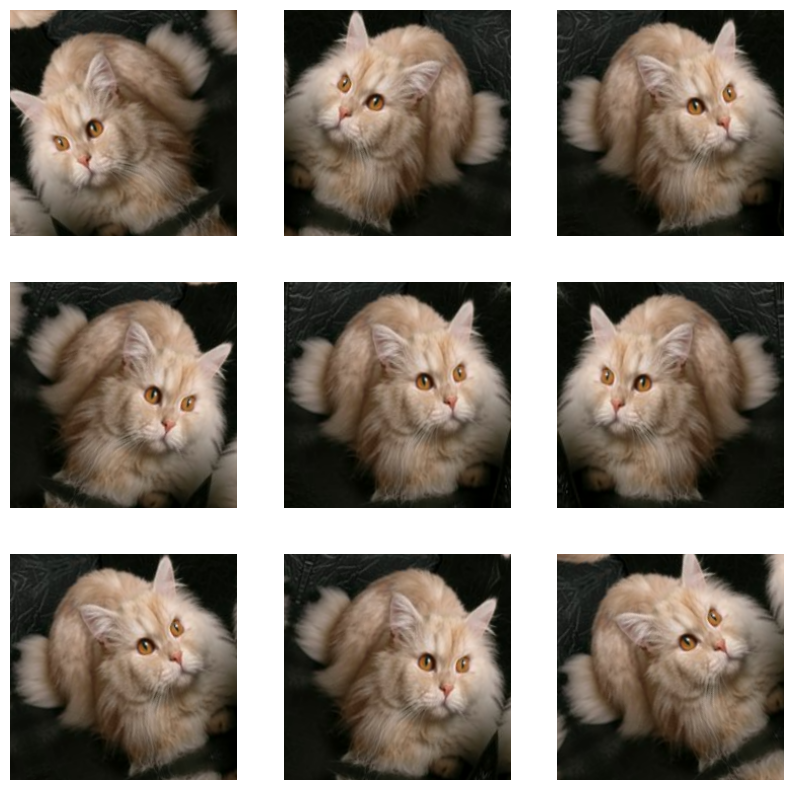

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [12]:
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y))

## Define Model and Train

In [54]:
!pip install pydot
!pip install graphviz


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [13]:
# Define the base model and add a classifier on top
base_model = MobileNet(input_shape=input_shape, include_top=False, weights="imagenet")
base_model.trainable = False
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [14]:
model.summary(expand_nested=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)       [(None, 224, 224, 3)]     0        |
|                                                               |
| conv1 (Conv2D)             (None, 112, 112, 32)      864      |
|                                                               |
| conv1_bn (BatchNormalizat  (None, 112, 112, 32)      128      |
| ion)                                                          |
|                                                               |
| conv1_relu (ReLU)          (None, 112, 112, 32)      0        |
|                                                               |
| conv_dw_1 (DepthwiseConv2  (None, 112, 112, 32)     

| conv_pw_7_bn (BatchNormal  (None, 14, 14, 512)       2048     |
| ization)                                                      |
|                                                               |
| conv_pw_7_relu (ReLU)      (None, 14, 14, 512)       0        |
|                                                               |
| conv_dw_8 (DepthwiseConv2  (None, 14, 14, 512)       4608     |
| D)                                                            |
|                                                               |
| conv_dw_8_bn (BatchNormal  (None, 14, 14, 512)       2048     |
| ization)                                                      |
|                                                               |
| conv_dw_8_relu (ReLU)      (None, 14, 14, 512)       0        |
|                                                               |
| conv_pw_8 (Conv2D)         (None, 14, 14, 512)       262144   |
|                                                               |
| conv_pw_

In [15]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "mobilenet_1.00_224_input"}, "registered_name": null}, {"module": "keras.src.engine.functional", "class_name": "Functional", "config": {"name": "mobilenet_1.00_224", "trainable": false, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv1", "trainable": false, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [2, 2], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": false, "

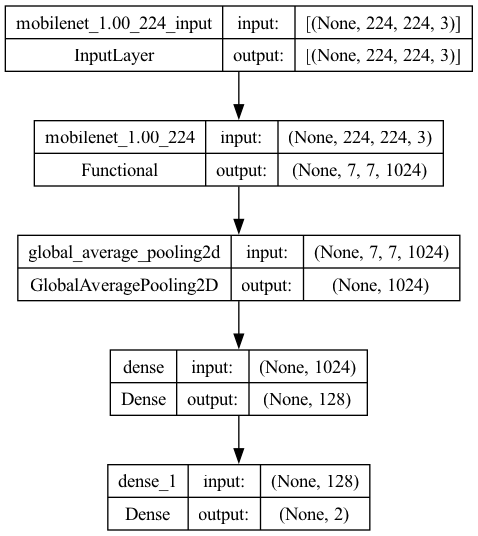

In [16]:
try:
    import pydot_ng as pydot
except ImportError:
    import pydot 
    
# install pydot and graphviz (brew install graphviz) for plot_model to work
plot_model(model, to_file='model.png', show_shapes=True)

In [17]:
# Compile the model with a loss function and optimizer
# for mac m1 use legacy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.legacy.Adam(learning_rate=learning_rate),
    metrics=["accuracy"],
)

In [18]:
logdir = os.path.join("logs", experiment_name, run_name)
tb_callback = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, histogram_freq=1)

In [19]:
# Train the model and log metrics and the model itself to MLflow
history = model.fit(
    augmented_train_dataset,
    epochs=num_epochs,
    validation_data=val_dataset,
    verbose=2,
    callbacks=[tb_callback]
)

Epoch 1/27
5/5 - 3s - loss: 5.7815 - accuracy: 0.5063 - val_loss: 2.9174 - val_accuracy: 0.5128 - 3s/epoch - 550ms/step
Epoch 2/27
5/5 - 2s - loss: 1.8000 - accuracy: 0.5188 - val_loss: 0.5467 - val_accuracy: 0.6667 - 2s/epoch - 411ms/step
Epoch 3/27
5/5 - 2s - loss: 0.7535 - accuracy: 0.6375 - val_loss: 1.2001 - val_accuracy: 0.4872 - 2s/epoch - 425ms/step
Epoch 4/27
5/5 - 2s - loss: 0.7089 - accuracy: 0.6375 - val_loss: 0.4528 - val_accuracy: 0.8205 - 2s/epoch - 415ms/step
Epoch 5/27
5/5 - 2s - loss: 0.4954 - accuracy: 0.7688 - val_loss: 0.5607 - val_accuracy: 0.6667 - 2s/epoch - 408ms/step
Epoch 6/27
5/5 - 2s - loss: 0.5401 - accuracy: 0.7250 - val_loss: 0.6446 - val_accuracy: 0.6923 - 2s/epoch - 461ms/step
Epoch 7/27
5/5 - 2s - loss: 0.5431 - accuracy: 0.7063 - val_loss: 0.4338 - val_accuracy: 0.7692 - 2s/epoch - 397ms/step
Epoch 8/27
5/5 - 2s - loss: 0.4373 - accuracy: 0.7750 - val_loss: 0.6529 - val_accuracy: 0.6410 - 2s/epoch - 411ms/step
Epoch 9/27
5/5 - 2s - loss: 0.3926 - acc

In [20]:
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:
    
    mlflow.set_experiment_tag("base_model", "MobileNet")
    mlflow.set_tag("optimizer", "keras.optimizers.legacy.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")

    mlflow.keras.log_model(model, "model")

    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("input_shape", input_shape)

    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("train_acc", history.history["accuracy"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])
    mlflow.log_metric("val_acc", history.history["val_accuracy"][-1])

    mlflow.log_artifact("model.png", "model_plot")

    mlflow_run_id = mlflow_run.info.run_id
    print("MLFlow Run ID: ", mlflow_run_id)

2023/10/09 21:46:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/6v/q4yll1yn54zd7kqsq5dpxc440000gq/T/tmp72cs4rep/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/6v/q4yll1yn54zd7kqsq5dpxc440000gq/T/tmp72cs4rep/model/data/model/assets


MLFlow Run ID:  dd30bcc0a5c74f28a4a8cdfc103386d2


## Predictions

In [21]:
img = keras.preprocessing.image.load_img(
    os.path.join(train_image_path, "cat/Image_13.jpg"), target_size=input_shape
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

1/1 [==============================] - 0s 178ms/step
This image is 99.92% cat and 0.08% dog.


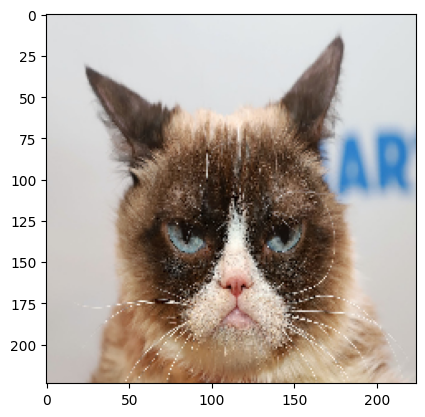

In [22]:
predictions = model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

## Using MLFlow to predict

In [23]:
# Logged model in MLFlow
logged_model_path = f"runs:/{mlflow_run_id}/model"

# Load model as a Keras model
loaded_model = mlflow.keras.load_model(logged_model_path)

1/1 [==============================] - 0s 160ms/step
This image is 99.92% cat and 0.08% dog.


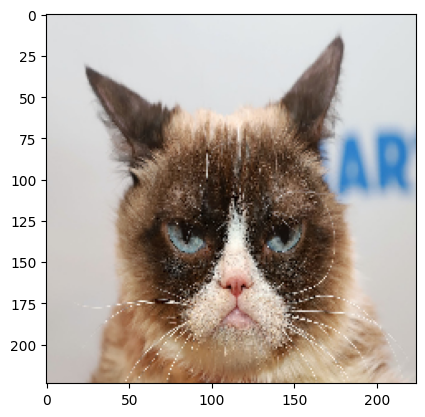

In [24]:
predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

## Model Registration

In [25]:
model_name = "cat_dog_classifier"
model_version = 1

In [26]:
print("MLFlow Run ID: ", mlflow_run_id)

MLFlow Run ID:  dd30bcc0a5c74f28a4a8cdfc103386d2


In [27]:
with mlflow.start_run(run_id=mlflow_run_id) as run:
    result = mlflow.register_model(
        logged_model_path,
        model_name
    )

Registered model 'cat_dog_classifier' already exists. Creating a new version of this model...
2023/10/09 21:47:27 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: cat_dog_classifier, version 2
Created version '2' of model 'cat_dog_classifier'.


1/1 [==============================] - 0s 147ms/step
This image is 100.00% cat and 0.00% dog.


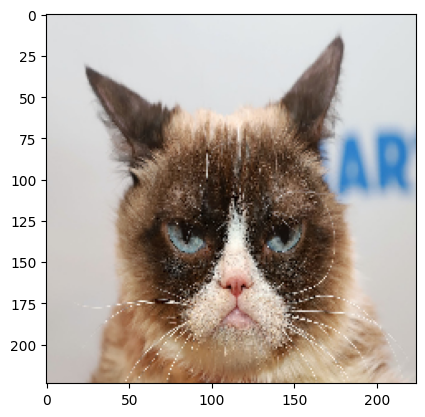

In [28]:
# Load model as a Keras model
loaded_model = mlflow.keras.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

## Transition model to production

In [29]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Production"
)

<ModelVersion: aliases=[], creation_timestamp=1696872804865, current_stage='Production', description=None, last_updated_timestamp=1696881032948, name='cat_dog_classifier', run_id='348a78d2233f4c0d99601511b59c652a', run_link=None, source='file:///Users/manassamantaray/Projects/streamlit-mlflow/mlruns/263766177534100954/348a78d2233f4c0d99601511b59c652a/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

1/1 [==============================] - 0s 152ms/step
This image is 100.00% cat and 0.00% dog.


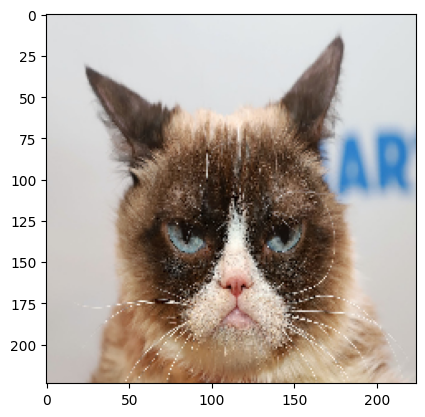

In [30]:
# Load model as a Keras model
loaded_model = mlflow.keras.load_model(
    model_uri=f"models:/{model_name}/production"
)

predictions = loaded_model.predict(img_array)
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))

## Create endpoint for model serving

In [ ]:
# Run environment variable for MLFlow URI and MLFlow Server for the model on the terminal

In [31]:
# !export MLFLOW_TRACKING_URI=http://localhost:5000

In [32]:
# !mlflow models serve --model-uri models:/cat_dog_classifier/production -p 5001 --no-conda

2023/10/09 22:09:34 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'
2023/10/09 22:09:34 INFO mlflow.pyfunc.backend: === Running command 'exec gunicorn --timeout=60 -b 127.0.0.1:5001 -w 1 ${GUNICORN_CMD_ARGS} -- mlflow.pyfunc.scoring_server.wsgi:app'
[2023-10-09 22:09:35 +0200] [34976] [INFO] Starting gunicorn 21.2.0
[2023-10-09 22:09:35 +0200] [34976] [INFO] Listening at: http://127.0.0.1:5001 (34976)
[2023-10-09 22:09:35 +0200] [34976] [INFO] Using worker: sync
[2023-10-09 22:09:35 +0200] [34977] [INFO] Booting worker with pid: 34977
2023/10/09 22:09:36 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - boto3 (current: 1.26.21, required: boto3==1.28.3)
 - dill (current: uninstalled, required: dill==0.3.6)
 - numpy (current: 1.25.1, required: numpy==1.24.1)
 - pandas (current: 2.1.1, required: pandas==1.5.2)
 - protobuf (current: 4.24.4, required: protobuf==4.23.4)
 - p

In [35]:
endpoint = "http://localhost:5001/invocations"

This image is 100.00% cat and 0.00% dog.


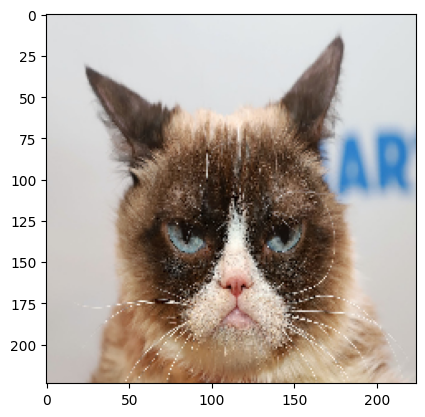

In [38]:
image_request = {
        "instances":img_array.numpy().tolist()
}

response = requests.post(endpoint, json=image_request)

predictions = eval(response.text)["predictions"]
print("This image is {:.2f}% cat and {:.2f}% dog.".format(100 * float(predictions[0][0]),
                                                          100 * float(predictions[0][1])))

plt.imshow(img_array[0].numpy().astype("uint8"))